Project

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iitm-datasets/test_data_v2.csv
/kaggle/input/iitm-datasets/train_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv


In [ ]:
model_list = {}

In [ ]:
import pandas as pd

from scipy import stats
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer

In [ ]:
data_test= pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv')
data_train=pd.read_csv("/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv")




In [ ]:
data_train = data_train.apply(lambda x: x.str.strip() if isinstance(x, str) else x).replace('', np.nan)


In [ ]:
data_train.isna().sum()

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
Made_Purchase                        0
dtype: int64

In [ ]:
colunms_encode = ['Month_SeasonalPurchase', 'CustomerType', 'Gender', 'Cookies Setting', 'Marital Status', 'Education']
colunms_encoded = pd.get_dummies(data_train[colunms_encode])


colunms_encoded_test = pd.get_dummies(data_test[colunms_encode])


data_train = pd.concat([data_train, colunms_encoded ], axis=1)


data_test = pd.concat([data_test,colunms_encoded_test ], axis=1)


data_train.drop(colunms_encode, axis=1, inplace=True)
data_test.drop(colunms_encode, axis=1, inplace=True)

In [ ]:



imputer = KNNImputer(n_neighbors = 5)

data_train = pd.DataFrame(imputer.fit_transform(data_train), columns=data_train.columns)
data_test = pd.DataFrame(imputer.fit_transform(data_test), columns=data_test.columns)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
#scaler = StandardScaler()


scaler = MinMaxScaler()


scale_cols = ['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase', 'OS', 'SearchEngine',
       'Zone', 'Type of Traffic', 'WeekendPurchase',
       'Month_SeasonalPurchase_Aug', 'Month_SeasonalPurchase_Dec',
       'Month_SeasonalPurchase_Feb', 'Month_SeasonalPurchase_Jul',
       'Month_SeasonalPurchase_June', 'Month_SeasonalPurchase_Mar',
       'Month_SeasonalPurchase_May', 'Month_SeasonalPurchase_Nov',
       'Month_SeasonalPurchase_Oct', 'Month_SeasonalPurchase_Sep',
       'CustomerType_New_Visitor', 'CustomerType_Other',
       'CustomerType_Returning_Visitor', 'Gender_Female', 'Gender_Male',
       'Gender_Not Specified', 'Cookies Setting_ALL', 'Cookies Setting_Deny',
       'Cookies Setting_Required', 'Marital Status_Married',
       'Marital Status_Other', 'Marital Status_Single', 'Education_Diploma',
       'Education_Graduate', 'Education_Not Specified', 'Education_Others']




data_train[scale_cols] = scaler.fit_transform(data_train[scale_cols])


data_test[scale_cols] = scaler.fit_transform(data_test[scale_cols])

In [ ]:
x_train = data_train.drop('Made_Purchase', axis='columns')
y_train = data_train['Made_Purchase']



In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14731 non-null  float64
 1   HomePage_Duration                14731 non-null  float64
 2   LandingPage                      14731 non-null  float64
 3   LandingPage_Duration             14731 non-null  float64
 4   ProductDescriptionPage           14731 non-null  float64
 5   ProductDescriptionPage_Duration  14731 non-null  float64
 6   GoogleMetric:Bounce Rates        14731 non-null  float64
 7   GoogleMetric:Exit Rates          14731 non-null  float64
 8   GoogleMetric:Page Values         14731 non-null  float64
 9   SeasonalPurchase                 14731 non-null  float64
 10  OS                               14731 non-null  float64
 11  SearchEngine                     14731 non-null  float64
 12  Zone              

<AxesSubplot:>

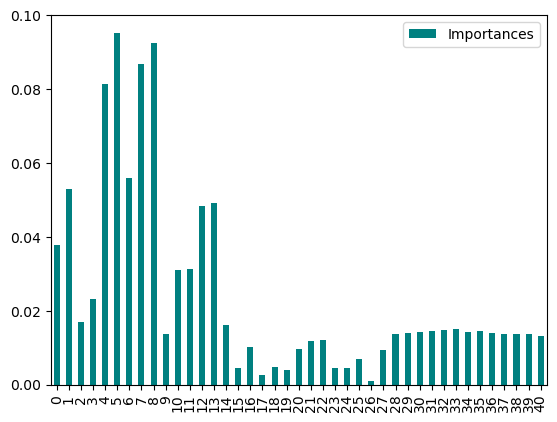

In [ ]:

model_1 = RandomForestClassifier(n_estimators = 340)

model_1.fit(x_train,y_train)

importances = model_1.feature_importances_

final_df = pd.DataFrame({'Features':pd.DataFrame(x_train).columns,'Importances':importances})

final_df.set_index('Importances')

final_df.plot.bar(color = 'Teal')

In [ ]:
x_train_best = x_train.drop(['Month_SeasonalPurchase_Aug', 'Month_SeasonalPurchase_Dec',
                            'Month_SeasonalPurchase_Feb', 'Month_SeasonalPurchase_Jul',
                            'Month_SeasonalPurchase_June', 'Month_SeasonalPurchase_Mar',
                            'Month_SeasonalPurchase_May', 'Month_SeasonalPurchase_Nov',
                            'Month_SeasonalPurchase_Oct', 'Month_SeasonalPurchase_Sep',
                            'CustomerType_New_Visitor', 'CustomerType_Other',
                            'CustomerType_Returning_Visitor', 'Gender_Female', 'Gender_Male',
                            'Gender_Not Specified', 'Cookies Setting_ALL', 'Cookies Setting_Deny',
                            'Cookies Setting_Required', 'Marital Status_Married',
                            'Marital Status_Other', 'Marital Status_Single', 'Education_Diploma',
                            'Education_Graduate', 'Education_Not Specified', 'Education_Others',
                             'LandingPage', 'LandingPage_Duration','SeasonalPurchase', 'OS',
                             'SearchEngine','WeekendPurchase'],axis = 1)


x_test_best = data_test.drop(['Month_SeasonalPurchase_Aug', 'Month_SeasonalPurchase_Dec',
                            'Month_SeasonalPurchase_Feb', 'Month_SeasonalPurchase_Jul',
                            'Month_SeasonalPurchase_June', 'Month_SeasonalPurchase_Mar',
                            'Month_SeasonalPurchase_May', 'Month_SeasonalPurchase_Nov',
                            'Month_SeasonalPurchase_Oct', 'Month_SeasonalPurchase_Sep',
                            'CustomerType_New_Visitor', 'CustomerType_Other',
                            'CustomerType_Returning_Visitor', 'Gender_Female', 'Gender_Male',
                            'Gender_Not Specified', 'Cookies Setting_ALL', 'Cookies Setting_Deny',
                            'Cookies Setting_Required', 'Marital Status_Married',
                            'Marital Status_Other', 'Marital Status_Single', 'Education_Diploma',
                            'Education_Graduate', 'Education_Not Specified', 'Education_Others',
                            'LandingPage', 'LandingPage_Duration','SeasonalPurchase', 'OS',
                            'SearchEngine','WeekendPurchase'],axis = 1)

In [ ]:
x_tr,x_ts,y_tr,y_ts = train_test_split(x_train_best,y_train,test_size = 0.3,random_state = 7)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators=200, learning_rate=0.01, random_state=0)

In [ ]:
model.fit(x_tr,y_tr)

y_pred = model.predict(x_ts)
y_pred = y_pred.astype(bool)
y_pred
from sklearn.metrics import accuracy_score
a=accuracy_score(y_ts,y_pred)

model_list[str(model)] = a


In [ ]:
print(a)

0.92345435


In [ ]:
model.fit(x_train_best, y_train)

AdaBoostClassifier(learning_rate=0.01, n_estimators=200, random_state=0)

In [ ]:
'''from sklearn.linear_model import LogisticRegression

model = LogisticRegression()


model.fit(x_train_best,y_train)'''




'from sklearn.linear_model import LogisticRegression\n\nmodel = LogisticRegression()\n\n\nmodel.fit(x_train_best,y_train)'

In [ ]:
y_pred = model.predict(x_test_best)
y_pred = y_pred.astype(bool)
y_pred

array([False, False, False, ..., False, False, False])

In [ ]:
submission=pd.DataFrame(columns=['id', 'Made_Purchase'])
submission['id']=[i for i in range(len(y_pred))]
submission["Made_Purchase"]=[i for i in y_pred]
submission.to_csv('submission.csv',index=False)